In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = "FreeMono"
plt.rcParams['font.size'] = 13
plt.rcParams['font.weight'] = "bold"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["skyblue", "yellow","#E77900", "#9D0001", "#640000"])

In [2]:
ipc_area_latest = pd.read_csv('ipc_pse_area_long_latest.csv')

# IPC Area Data

In [3]:
ipc_area_latest.head(15)

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,all,400000,1.00
1,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3+,360000,0.90
2,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,1,0,0.00
3,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,2,40000,0.10
4,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3,180000,0.45
5,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,4,160000,0.40
6,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,5,20000,0.05
7,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,all,400000,1.00
8,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,3+,400000,1.00
9,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,1,0,0.00


In [4]:
ipc_area_latest["Area"] = ipc_area_latest["Area"].str.title()
ipc_area_latest["Area"].unique()

array(['Deir Al-Balah', 'Gaza', 'Khan Younis', 'North Gaza', 'Rafah'],
      dtype=object)

In [5]:
IPC_Area = ipc_area_latest[~ipc_area_latest["Phase"].isin(["all", "3+"])][["Number", "Phase", "Area", "Date of analysis", "Validity period"]].groupby(["Area", "Phase", "Date of analysis", "Validity period"]).sum()

Deir_al_balah_current = IPC_Area.xs(("Deir Al-Balah", "current"), level=["Area", "Validity period"])
Deir_al_balah_projection = IPC_Area.xs(("Deir Al-Balah", "first projection"), level=["Area", "Validity period"])

In [6]:
idx = pd.IndexSlice
subset_deir_al_balah = Deir_al_balah_current.loc[idx[["1","2","3","4","5"], ["Apr 2025"]], :]

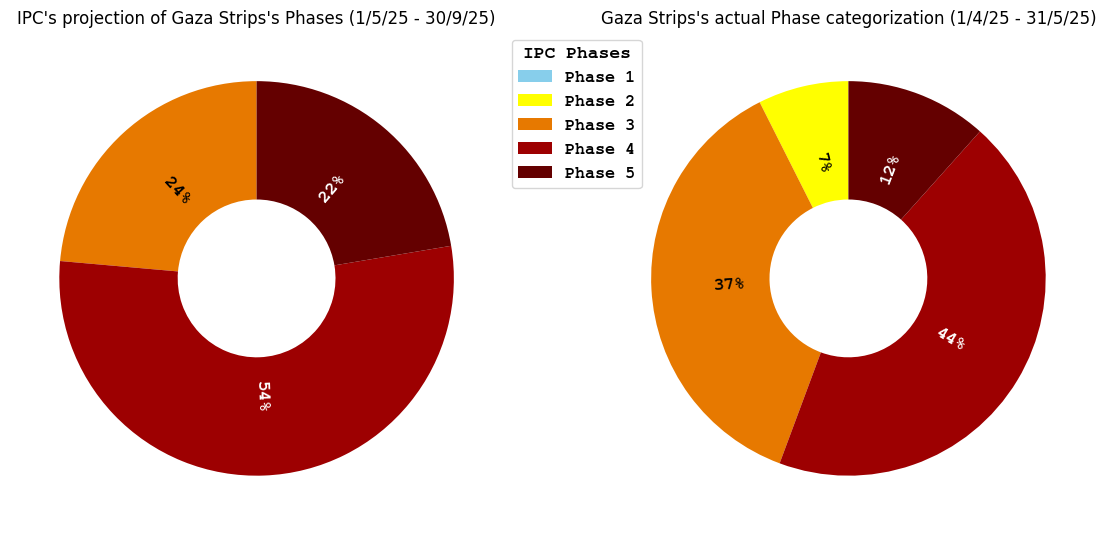

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

IPC_Phase_Latest = ipc_area_latest[~ipc_area_latest["Phase"].isin(["all", "3+"])][["Number", "Phase", "Validity period"]].groupby(["Phase", "Validity period"]).sum()

IPC_Phase_Latest_current = IPC_Phase_Latest.xs("current", level="Validity period")
IPC_Phase_Latest_projection = IPC_Phase_Latest.xs("first projection", level="Validity period")

labels = [f"Phase {phase}" for phase in IPC_Phase_Latest_projection.index.get_level_values("Phase")]

pie = ax1.pie(data=IPC_Phase_Latest_projection, x=IPC_Phase_Latest_projection["Number"], wedgeprops=dict(width=0.6),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '')
ax1.legend(labels, bbox_to_anchor=(1, 1), title="IPC Phases", fontsize=12)
# plt.xticks(rotation=90)
ax1.grid(True, linestyle="-.")
ax1.set_title("IPC's projection of Gaza Strips's Phases (1/5/25 - 30/9/25)",
              fontdict = {"fontweight":"normal", "fontfamily":"sans-serif", "fontsize":12})
# ax1.xaxis.set_label_coords(0.5, -0.07)
 
pie2 = ax2.pie(data=IPC_Phase_Latest_current, x=IPC_Phase_Latest_current["Number"], wedgeprops=dict(width=0.6),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '')

for wedge, pct_text, wedge2, pct_text2 in zip(pie[0], pie[2], pie2[0], pie2[2]):
    angle, angle2 = (wedge.theta2 + wedge.theta1)/2, (wedge2.theta2 + wedge2.theta1)/2

    pct_text.set_rotation_mode('anchor')
    pct_text2.set_rotation_mode('anchor')

    if 90 < angle < 270:
        pct_text.set_rotation(angle + 180)
    else:
        pct_text.set_rotation(angle)
    
    if 90 < angle2 < 270:
        pct_text2.set_rotation(angle2 + 180)
    else:
        pct_text2.set_rotation(angle2)
pct_text = pie[2]
pct_text2 = pie2[2]
pct_text[4].set_color("white")
pct_text2[4].set_color("white")

[pct_text2[i].set_color("white") for i in [3]]
[pct_text[i].set_color("white") for i in [3]]

ax2.set_title("Gaza Strips's actual Phase categorization (1/4/25 - 31/5/25)",
              fontdict = {"fontweight":"normal", "fontfamily":"sans-serif", "fontsize":12})
# plt.savefig("Gaza Strip's Projection and Actual phase categorization.png")
plt.show()

In [8]:
IPC_Area_Latest = ipc_area_latest[~ipc_area_latest["Phase"].isin(["all", "3+"])][["Number", "Area", "Phase", "Validity period"]].groupby(["Area", "Phase", "Validity period"]).sum()

IPC_North_Gaza_Latest_current = IPC_Area_Latest.xs(("current", "North Gaza"), level=["Validity period", "Area"])

IPC_Gaza_Latest_current = IPC_Area_Latest.xs(("current", "Gaza"), level=["Validity period", "Area"])

IPC_Deir_al_balah_Latest_current = IPC_Area_Latest.xs(("current", "Deir Al-Balah"), level=["Validity period", "Area"])

IPC_Khan_younis_Latest_current = IPC_Area_Latest.xs(("current", "Khan Younis"), level=["Validity period", "Area"])

IPC_Rafah_Latest_current = IPC_Area_Latest.xs(("current", "Rafah"), level=["Validity period", "Area"])

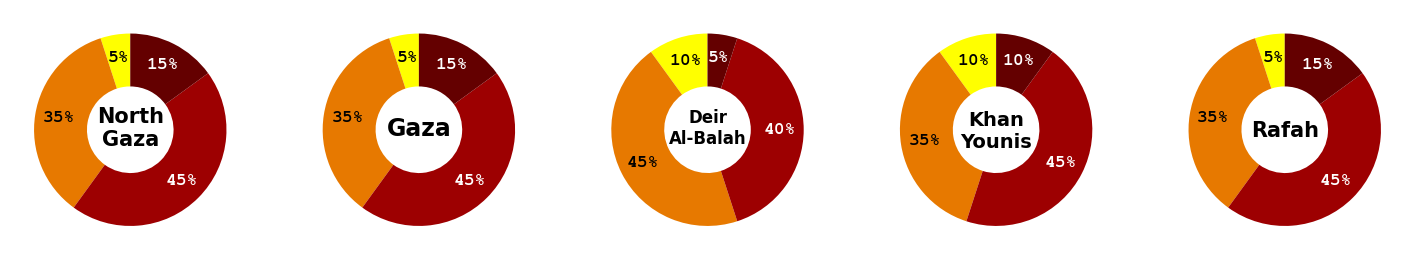

In [9]:
fig, (north_gaza, gaza, deir_al_balah, khan_younis, rafah) = plt.subplots(1, 5, figsize=(18, 8), sharex=True)

labels = [f"Phase {phase}" for phase in IPC_Area_Latest.index.get_level_values("Phase")]

pie = north_gaza.pie(data=IPC_North_Gaza_Latest_current, x=IPC_North_Gaza_Latest_current["Number"], wedgeprops=dict(width=0.55),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', pctdistance=0.75)
north_gaza.text(0, 0.015, "North\nGaza", fontdict = {"fontfamily":"sans-serif", "fontsize":15}, ha='center', va='center', color='black', fontweight='bold')
pct_text = pie[2]
[pct_text[i].set_color("white") for i in [3, 4]]

pie2 = gaza.pie(data=IPC_Gaza_Latest_current, x=IPC_Gaza_Latest_current["Number"], wedgeprops=dict(width=0.55),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', pctdistance=0.75)
gaza.text(0, 0.015, "Gaza", fontdict = {"fontfamily":"sans-serif", "fontsize":17}, ha='center', va='center', color='black', fontweight='bold')
pct_text2 = pie2[2]
[pct_text2[i].set_color("white") for i in [3, 4]]

pie3 = deir_al_balah.pie(data=IPC_Deir_al_balah_Latest_current, x=IPC_Deir_al_balah_Latest_current["Number"], wedgeprops=dict(width=0.55),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', pctdistance=0.75)
deir_al_balah.text(0, 0.015, "Deir\nAl-Balah", fontdict = {"fontfamily":"sans-serif", "fontsize":12}, ha='center', va='center', color='black', fontweight='bold')
pct_text3 = pie3[2]
[pct_text3[i].set_color("white") for i in [3, 4]]

pie4 = khan_younis.pie(data=IPC_Khan_younis_Latest_current, x=IPC_Khan_younis_Latest_current["Number"], wedgeprops=dict(width=0.55),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', pctdistance=0.75)
khan_younis.text(0, -0.01, "Khan\nYounis", fontdict = {"fontfamily":"sans-serif", "fontsize":14}, ha='center', va='center', color='black', fontweight='bold')
pct_text4 = pie4[2]
[pct_text4[i].set_color("white") for i in [3, 4]]

pie5 = rafah.pie(data=IPC_Rafah_Latest_current, x=IPC_Rafah_Latest_current["Number"], wedgeprops=dict(width=0.55),
            startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
            pctdistance=0.75)
rafah.text(0, -0.01, "Rafah", fontdict = {"fontfamily":"sans-serif", "fontsize":15}, ha='center', va='center', color='black', fontweight='bold')
pct_text5 = pie5[2]
[pct_text5[i].set_color("white") for i in [3, 4]]

# plt.savefig("Gaza Strip's Actual phase categorization per governorate.png")
plt.show()

In [10]:
IPC_Area_Latest

Number
Area          Phase Validity period         
Deir Al-Balah 1     current                0
                    first projection       0
              2     current            40000
                    first projection       0
              3     current           180000
                    first projection  120000
              4     current           160000
                    first projection  220000
              5     current            20000
                    first projection   60000
Gaza          1     current                0
                    first projection       0
              2     current            37000
                    first projection       0
              3     current           259000
                    first projection  185000
              4     current           333000
                    first projection  370000
              5     current           111000
                    first projection  185000
Khan Younis   1     current                0
                    first projection       0
              2     current            62000
                    first projection       0
              3     current           217000
                    first projection  155000
              4     current           279000
                    first projection  341000
              5     current            62000
                    first projection  124000
North Gaza    1     current                0
                    first projection       0
              2     current            15500
                    first projection       0
              3     current           108500
                    first projection   31000
              4     current           139500
                    first projection  186000
              5     current            46500
                    first projection   93000
Rafah         1     current                0
                    first projection       0
              2     current             1500
                    first projection       0
              3     current            10500
                    first projection    4500
              4     current            13500
                    first projection   18000
              5     current             4500
                    first projection    7500